# Data Exploration

## Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Load Data

In [ ]:
data_path = "On-street_Car_Parking_Sensor_Data_-_2017.csv" 
# TODO Change path once data is downloaded
df = pd.read_csv(data_path, dtype={"DeviceId": str, "In Violation": int, "Vehicle Present": int})
df.head()

In [ ]:
df.info()

## Analyze Parking Violations

In [5]:
print("Number of violations")
print(df["In Violation"].value_counts())
print("\nPercentage of violations")
print(df["In Violation"].value_counts(normalize=True))

Number of violations
0.0    5525174
1.0     235644
Name: In Violation, dtype: int64

Percentage of violations
0.0    0.959095
1.0    0.040905
Name: In Violation, dtype: float64


### Per District

#### Number Of Violations

In [6]:
df.groupby(['Area'])["In Violation"].sum().sort_values(ascending=False)

Area
Docklands          45680.0
Queensberry        17082.0
Southbank          16789.0
Jolimont           12221.0
Courtney           10886.0
Princes Theatre    10665.0
Titles             10049.0
Victoria Market     7416.0
Hardware            7037.0
Library             6416.0
Mint                5783.0
City Square         5468.0
Regency             5407.0
McKillop            5371.0
East Melbourne      5210.0
The Mac             4789.0
Twin Towers         4776.0
West Melbourne      4607.0
Windsor             4567.0
Supreme             4334.0
County              4284.0
Family              4261.0
Banks               4207.0
Hyatt               3988.0
University          3983.0
Chinatown           3896.0
Magistrates         3377.0
Spencer             3065.0
RACV                2955.0
Tavistock           2068.0
Rialto              1916.0
Degraves            1274.0
Drummond             948.0
Markilles            860.0
Kensington             5.0
Name: In Violation, dtype: float64

Average number of violations:  6732.571428571428


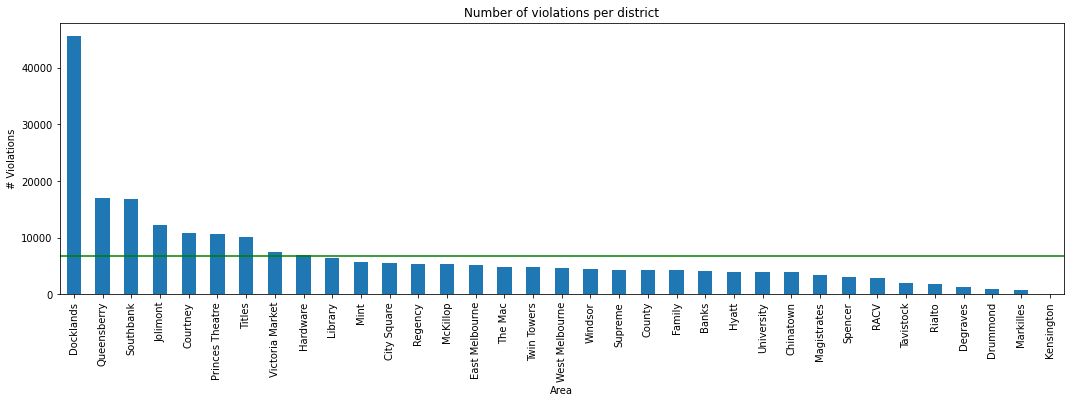

In [7]:
fig, ax = plt.subplots()
df.groupby(['Area'])["In Violation"].sum().sort_values(ascending=False).plot(kind="bar", figsize=(18, 5), title="Number of violations per district")
ax.set_ylabel("# Violations")
mean = df.groupby(['Area'])["In Violation"].sum().mean()
ax.axhline(mean, color = "g")
print("Average number of violations: ", mean)

#### Percentage of Violations

In [8]:
(df.groupby(['Area'])["In Violation"].sum()/df.groupby(['Area'])["In Violation"].count()).sort_values(ascending=False)

Area
City Square        0.079197
Courtney           0.075901
McKillop           0.061916
Docklands          0.058040
Hardware           0.053301
Chinatown          0.050686
Windsor            0.050125
Tavistock          0.049610
Twin Towers        0.049490
RACV               0.047426
Degraves           0.046818
West Melbourne     0.046129
The Mac            0.045713
Titles             0.043054
Jolimont           0.042168
East Melbourne     0.041607
Library            0.039785
Victoria Market    0.039188
Southbank          0.038390
Princes Theatre    0.038106
University         0.037771
Family             0.037532
Mint               0.036537
Hyatt              0.036159
Spencer            0.033698
Queensberry        0.031210
Supreme            0.029688
Kensington         0.026316
Regency            0.025778
County             0.025150
Drummond           0.022931
Banks              0.020344
Rialto             0.019346
Markilles          0.019332
Magistrates        0.018525
Name: In Violat

Average percentage of violations:  0.04048473463796539


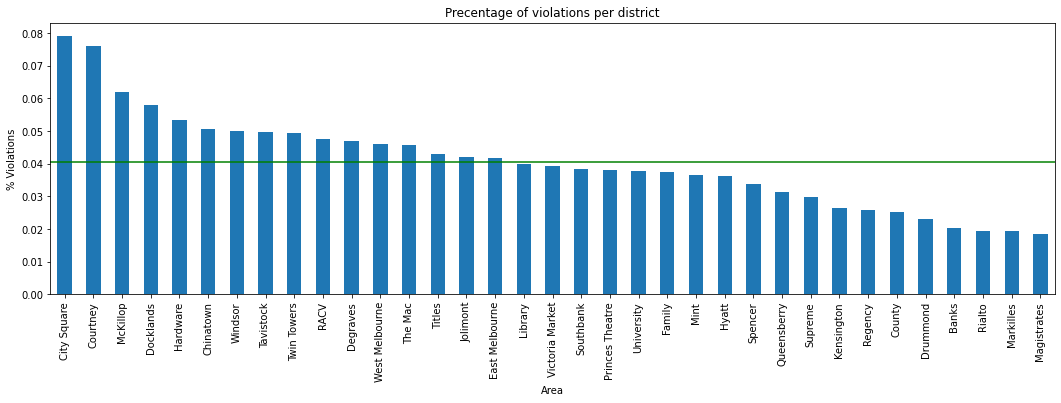

In [9]:
fig, ax = plt.subplots()
(df.groupby(['Area'])["In Violation"].sum()/df.groupby(['Area'])["In Violation"].count()).sort_values(ascending=False).plot(kind="bar", figsize=(18, 5), title="Precentage of violations per district")
ax.set_ylabel("% Violations")
mean = (df.groupby(['Area'])["In Violation"].sum()/df.groupby(['Area'])["In Violation"].count()).mean()
ax.axhline(mean, color = "g")
print("Average percentage of violations: ", mean)

### Time

In [10]:
violations = df[df["In Violation"] == True]["DurationSeconds"].describe()
non_violations = df[df["In Violation"] == False]["DurationSeconds"].describe()
together = df["DurationSeconds"].describe()
print("Seconds")
pd.DataFrame([violations, non_violations, together], index=["Violations", "Non Violations", "Both Together"])

,count,mean,std,min,25%,50%,75%,max
Violations,235640.0,8547.267026,24824.173184,421.0,3946.0,6153.0,10110.25,7606894.0
Non Violations,5525174.0,4627.290241,153541.741613,-6438099.0,229.0,930.0,3600.00,28987595.0
Both Together,5760814.0,4787.632743,150454.519581,-6438099.0,244.0,1040.0,3994.00,28987595.0


*TODO: How can a duration be negative? (see min values)*

In [27]:
print("Minutes")
pd.DataFrame([violations, non_violations, together], index=["Violations", "Non Violations", "Both Together"]).drop(columns=["count"])/60

Minutes


,mean,std,min,25%,50%,75%,max
Violations,142.454450,413.736220,7.016667,65.766667,102.550000,168.504167,126781.566667
Non Violations,77.121504,2559.029027,-107301.650000,3.816667,15.500000,60.000000,483126.583333
Both Together,79.793879,2507.575326,-107301.650000,4.066667,17.333333,66.566667,483126.583333


<AxesSubplot:xlabel='In Violation', ylabel='DurationSeconds'>

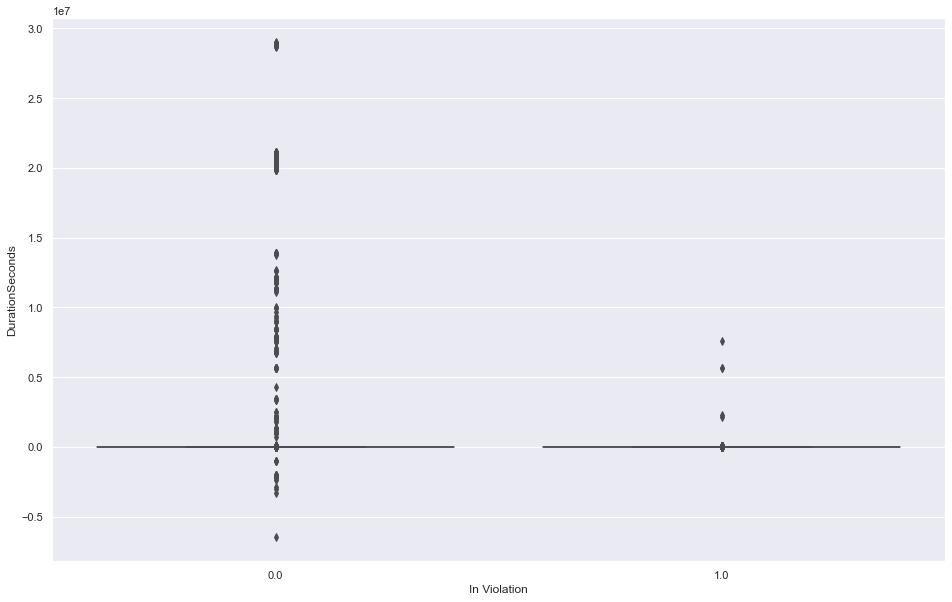

In [22]:
sns.set(rc={'figure.figsize':(16,10)})
sns.boxplot(x="In Violation", y="DurationSeconds", data=df)

Average violations per day:  33662.857142857145


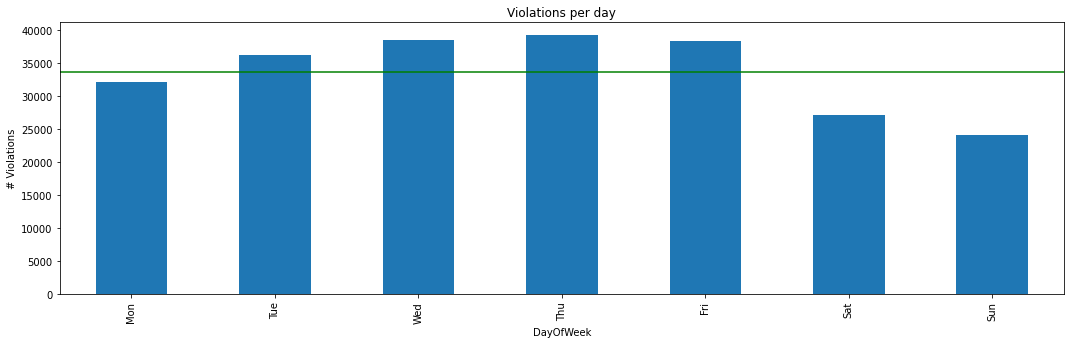

In [10]:
weekdays = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
df["DayOfWeek"] = pd.to_datetime(df["ArrivalTime"].astype(str).map(lambda x: x[:10])).dt.dayofweek
violations_per_wd = df.groupby(["DayOfWeek"])["In Violation"].sum()
#parking_per_wd = df.groupby(["DayOfWeek"])["In Violation"].count() - violations_per_wd

fig, ax = plt.subplots()
violations_per_wd.plot(kind="bar", figsize=(18, 5), title="Violations per day")
ax.set_xticklabels(weekdays)
ax.set_ylabel("# Violations")
mean = violations_per_wd.mean()
ax.axhline(mean, color = "g")
print("Average violations per day: ", mean)

### Spatial Correlation

<AxesSubplot:>

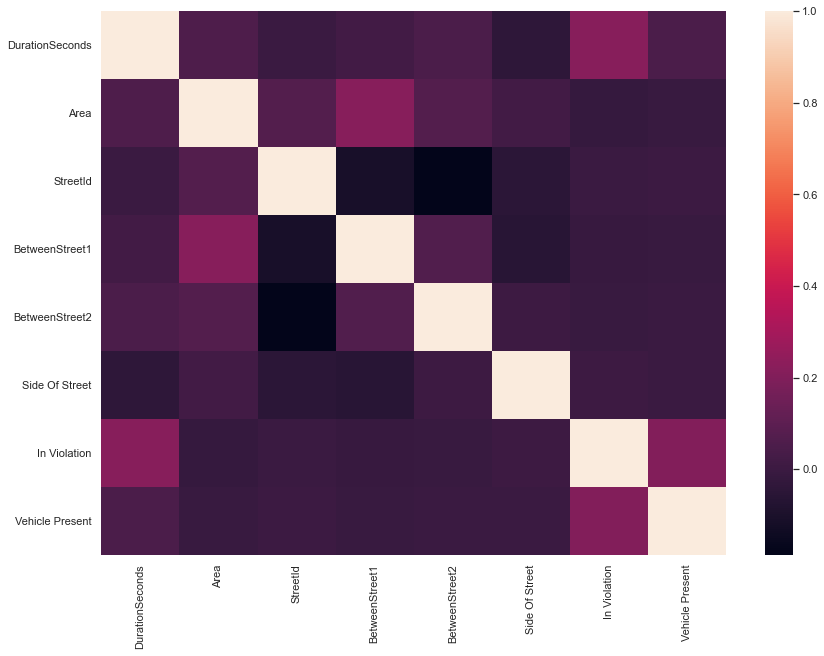

In [23]:
le = LabelEncoder()
df_new = df.copy()
for cat in ["Area", "BetweenStreet1", "BetweenStreet2"]:
    df_new[cat] = le.fit_transform(df_new[cat])
fig, ax = plt.subplots(figsize=(14,10))   
sns.heatmap(df_new.corr(method="spearman"))

In [4]:
data_path = "../data/Docklands.csv" 
df = pd.read_csv(data_path, dtype={"DeviceId": str, "In Violation": int, "Vehicle Present": int})
df.head()

,Unnamed: 0,DeviceId,ArrivalTime,DepartureTime,DurationSeconds,StreetMarker,Sign,Area,StreetId,StreetName,BetweenStreet1,BetweenStreet2,Side Of Street,In Violation,Vehicle Present
0,3,17670,02/09/2017 04:57:38 PM,02/09/2017 05:11:04 PM,806,13836N,2P TKT A M-SAT 7:30-18:30,Docklands,915,LITTLE DOCKLANDS DRIVE,WATERFRONT WAY,FOOTSCRAY ROAD,3,0,1
1,5,17512,09/27/2017 09:43:31 AM,09/27/2017 10:21:51 AM,2300,13642E,LZ 30M 722 M-Su 7:30-18:30,Docklands,810,IMPORT LANE,COLLINS STREET,BOURKE STREET,2,1,1
2,7,17185,10/10/2017 09:56:59 PM,10/10/2017 09:59:16 PM,137,13018N,NaN,Docklands,528,COLLINS STREET,HARBOUR ESPLANADE,NAVIGATION DRIVE,3,0,1
3,14,17751,10/20/2017 09:54:01 AM,10/20/2017 12:34:02 PM,9601,C13596,2P MTR M-SAT 7:30-18:30,Docklands,123,BOURKE STREET,GEOGRAPHE STREET,ENTERPRIZE WAY,1,1,1
4,18,17230,07/27/2017 11:25:02 AM,07/27/2017 11:25:27 AM,25,13085S,2P TKT A M-F 7:30-18:30,Docklands,528,COLLINS STREET,SEAFARER LANE,BOURKE STREET,4,0,0


In [11]:
sum(df.DurationSeconds <= 0)

4152